<a href="https://colab.research.google.com/github/Tjaarda1/ScalaExercises/blob/master/Practica2CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2: CNN - Reconocimiento de Dígitos Manuscritos

A continuación se presentarán los códigos, resultados e interpretaciones del desarrollo de los ejercicios propuestos frente a las redes neuronales convolucionales. Se hace uso de Tensorflow y para cada ejercicio, de la base de datos concreta correspondiente.

## Ejercicio 1: clasificación de dígitos manuscritos

Se carga el dataset de tensorflow keras: mnist. Empleando la función de definir modelo aportada en la asignatura, en conjunto con la especificación de la arquitectura aportada.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# NORMALIZACIÓN
train_images, test_images = train_images / 255.0, test_images / 255.0

# AÑADIMOS NÚMERO DE CANALES: 1, PORQUE ES EN ESCALA DE GRISES
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# SE DEFINE EL MODELO CNN EN BASE A LO APORTADO EN EL ENUNCIADO
def define_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(900, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = define_model()

# SE ESCOGE UN OPTIMIZADOR
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#  COMPILAMOS CON LOS ARGUMENTOS ESPECIFICADOS
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# MOSTRAMOS LA ARQUITECTURA DEL MODELO
model.summary()

# ENTRENAMOS EL MODELO, CON 10 ITERACIONES Y TAMAÑO DE BATCH 64
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# EVALUAMOS
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# MOSTRAMOS LA PRECISIÓN SOBRE EL CONJUNTO DE TEST
print('\nTest accuracy:', test_acc)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 1152)             

313/313 [==============================] - 3s 11ms/step


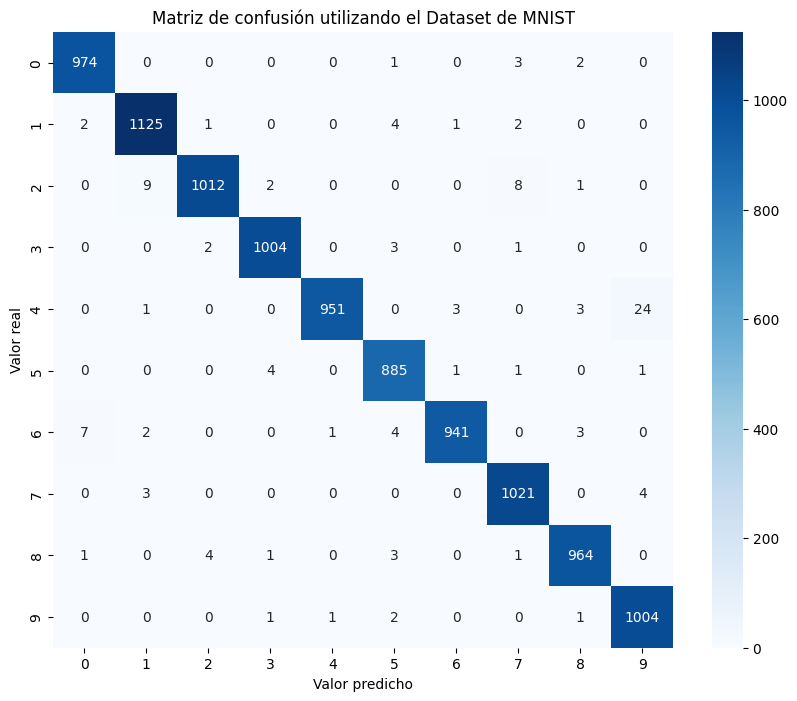

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# USAMOS EL MODELO PARA PREDECIR SOBRE LAS IMÁGENES DE TEST Y SACAMOS LAS CLASES
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# CALCULAMOS LA MATRIZ DE CONFUSIÓN
cm = confusion_matrix(test_labels, predicted_classes)

# CREAMOS UNA FIGURA PARA LA MATRIZ DE CONFUSIÓN
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de confusión utilizando el Dataset de MNIST')
plt.ylabel('Valor real')
plt.xlabel('Valor predicho')
plt.show()

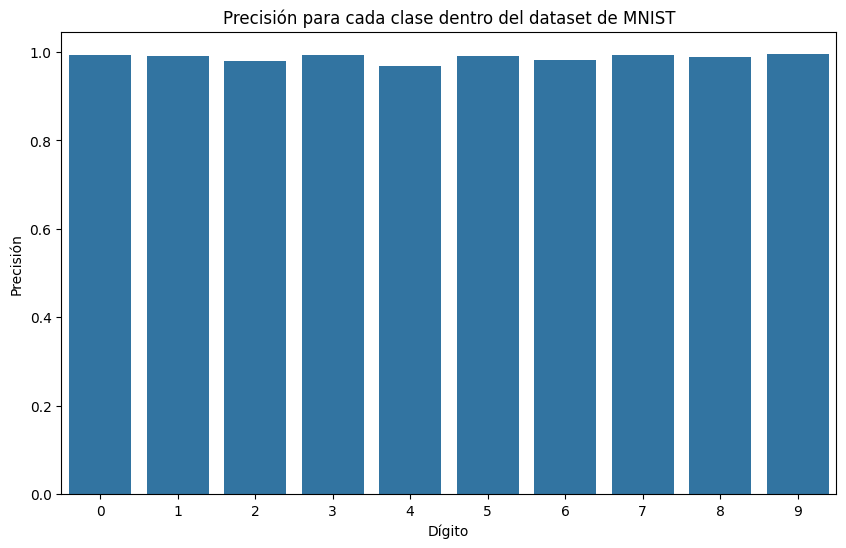

In [ ]:
# GRACIAS A LA MATRIZ DE CONFUSIÓN, PODEMOS SABER LA TASA DE ERROR POR CADA CLASE
class_accuracies = cm.diagonal() / cm.sum(axis=1)

# LAS CLASES SON LOS NÚMEROS DEL 0 AL 9
target_names = [str(i) for i in range(10)]

# MOSTRAMOS EN PANTALLA GRÁFICAS DE LA PRECISIÓN
plt.figure(figsize=(10, 6))
sns.barplot(x=target_names, y=class_accuracies)
plt.title('Precisión para cada clase dentro del dataset de MNIST')
plt.ylabel('Precisión')
plt.xlabel('Dígito')
plt.xticks(rotation=0)
plt.show()


## Ejercicio 2: Base de datos CIFAR10

Se adapta la definición del modelo para usar el nuevo dataset. Los cambios más relevantes encontrados son:
- Ajustar el tamaño de las imágenes: de 28x28x1 a 32x32x3. Ahora son más grandes y hay 3 capas porque están a color.
- Ajustar las columnas de cada categoría. Las categorías ahora son animales y vehículos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# NORMALIZACIÓN
train_images, test_images = train_images / 255.0, test_images / 255.0

# ADAPTAMOS EL MODELO EN BASE A QUE AHORA LAS IMÁGENES SON A COLOR Y 32X32
def define_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(900, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = define_model()

# SE ESCOGE UN OPTIMIZADOR
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#  COMPILAMOS CON LOS ARGUMENTOS ESPECIFICADOS
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# MOSTRAMOS LA ARQUITECTURA DEL MODELO
model.summary()

# DEFINIMOS LOS NOMBRES DE LAS CLASES EN BASE AL DATASET
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# ENTRENAMOS EL MODELO, CON 10 ITERACIONES Y TAMAÑO DE BATCH 64
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# EVALUAMOS
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# MOSTRAMOS LA PRECISIÓN SOBRE EL CONJUNTO DE TEST
print('\nTest accuracy:', test_acc)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 2048)             

313/313 [==============================] - 6s 21ms/step


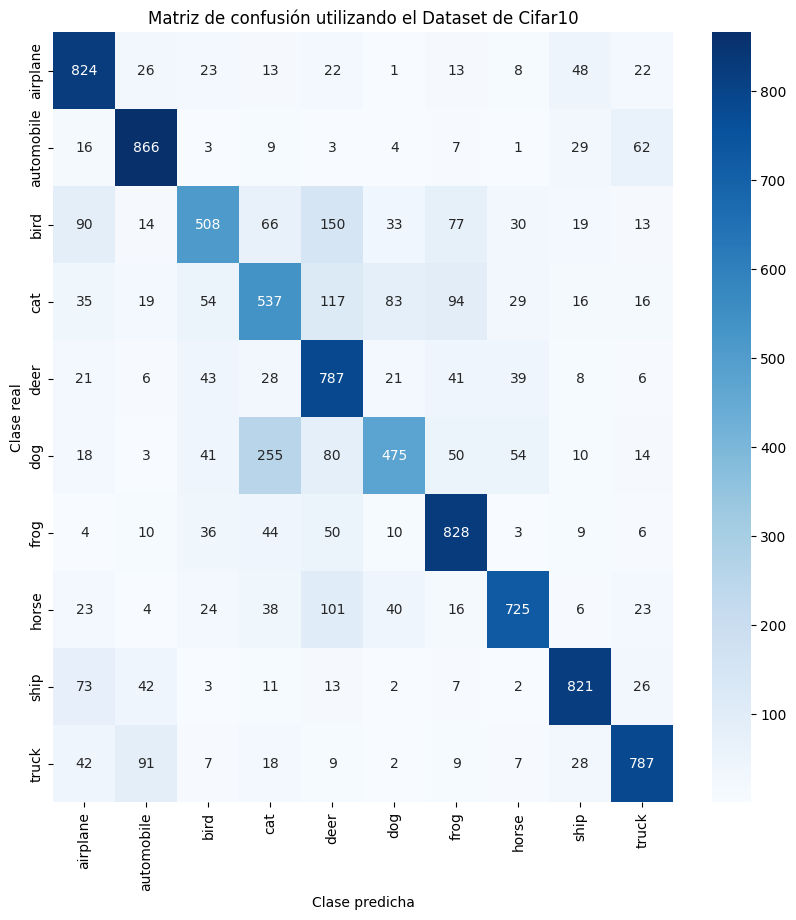

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# USAMOS EL MODELO PARA PREDECIR SOBRE LAS IMÁGENES DE TEST Y SACAMOS LAS CLASES
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# CALCULAMOS LA MATRIZ DE CONFUSIÓN
cm = confusion_matrix(true_classes, predicted_classes)

# CREAMOS UNA FIGURA PARA LA MATRIZ DE CONFUSIÓN
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de confusión utilizando el Dataset de Cifar10')
plt.ylabel('Clase real')
plt.xlabel('Clase predicha')
plt.show()


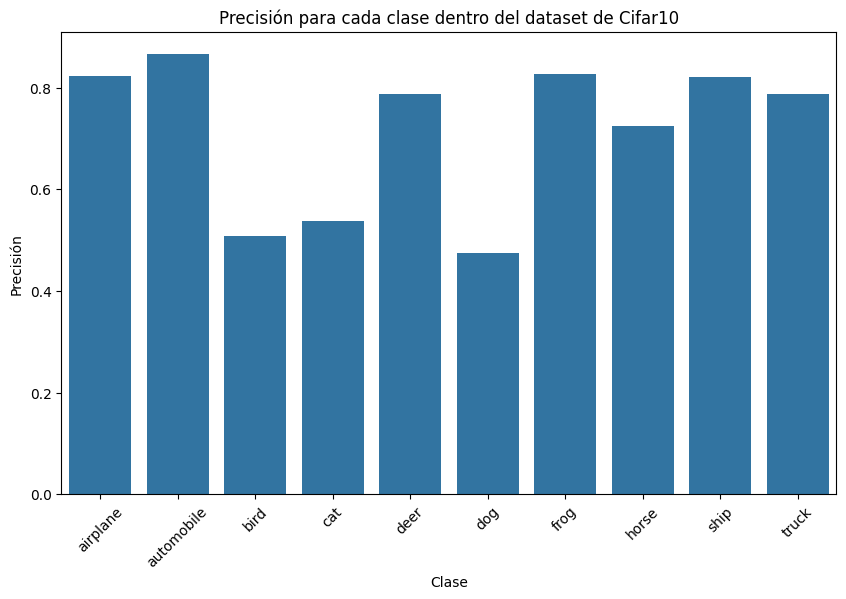

In [ ]:
# GRACIAS A LA MATRIZ DE CONFUSIÓN, PODEMOS SABER LA TASA DE ERROR POR CADA CLASE
class_accuracies = cm.diagonal() / cm.sum(axis=1)

# DEFINIMOS LOS NOMBRES DE LAS CLASES EN BASE AL DATASET
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# MOSTRAMOS EN PANTALLA GRÁFICAS DE LA PRECISIÓN
plt.figure(figsize=(10, 6))
sns.barplot(x=target_names, y=class_accuracies)
plt.title('Precisión para cada clase dentro del dataset de Cifar10')
plt.ylabel('Precisión')
plt.xlabel('Clase')
plt.xticks(rotation=45)
plt.show()